In [1]:
import re
import numpy as np
import pandas as pd

from utils import preprocess, plotutils

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_DIR = "./data/"
TRAIN_DATA_FILE = DATA_DIR + "olid-training-v1.0.tsv"

# Data Understanding

In [4]:
ori_train_data = pd.read_csv(TRAIN_DATA_FILE, sep='\t')

In [5]:
ori_train_data

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN
...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH
13238,27429,@USER Pussy,OFF,UNT,NaN


In [6]:
sub_a_labels = ori_train_data['subtask_a'].value_counts().to_dict()
sub_b_labels = ori_train_data['subtask_b'].value_counts().to_dict()
sub_c_labels = ori_train_data['subtask_c'].value_counts().to_dict()

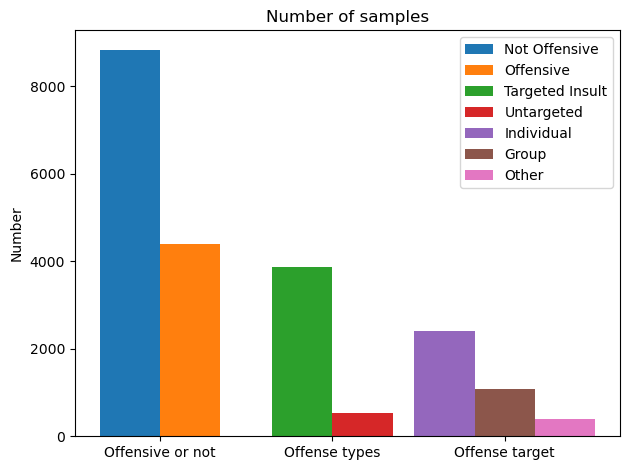

In [7]:
plotutils.plot_data_sample_bar_chart(sub_a_labels, sub_b_labels, sub_c_labels)

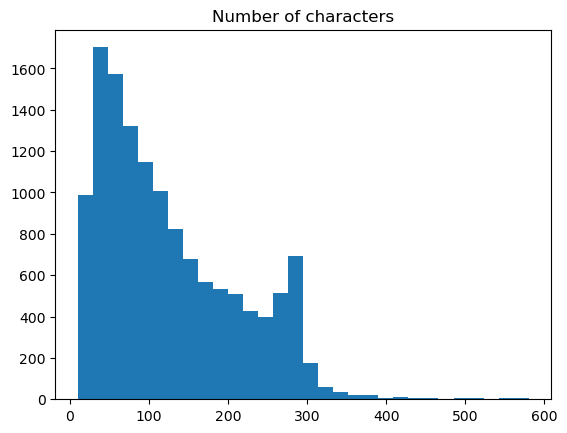

In [8]:
plotutils.plot_tweet_char_length_hist(ori_train_data['tweet'].to_list())

In [9]:
%%time

tweet_doc = preprocess.spacy_pipeline(ori_train_data['tweet'].to_list())
tweet_normalized_wo_stop = preprocess.spacy_normalize(tweet_doc, stop_removal=True)
tweet_normalized_with_stop = preprocess.spacy_normalize(tweet_doc, stop_removal=False)

CPU times: total: 1min 38s
Wall time: 1min 42s


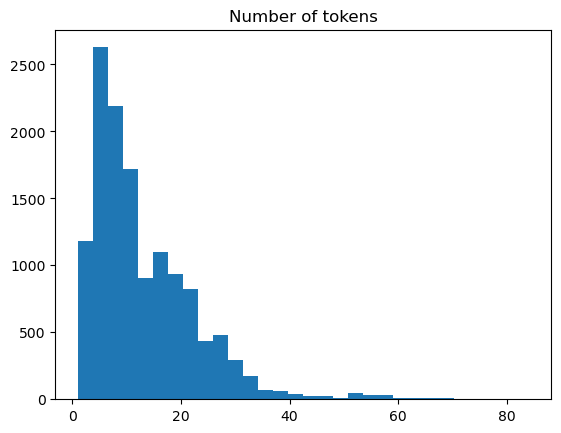

In [10]:
plotutils.plot_tweet_token_length_hist(tweet_normalized_wo_stop)

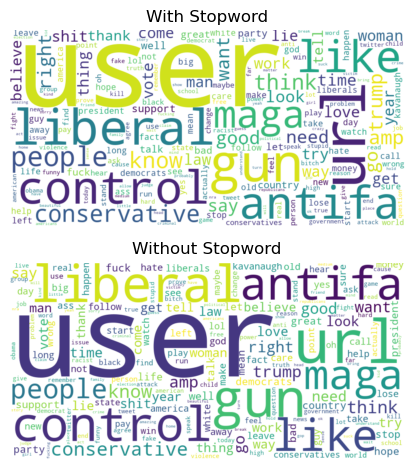

In [11]:
plotutils.plot_wordcloud("", ["With Stopword", "Without Stopword"], tweet_normalized_with_stop, tweet_normalized_wo_stop)

Remove the "@user" mask.

In [12]:
tweet_normalized_with_stop = preprocess.remove_user_mask(tweet_normalized_with_stop)
tweet_normalized_wo_stop = preprocess.remove_user_mask(tweet_normalized_wo_stop)

In [13]:
offensive_idx = ori_train_data[ori_train_data['subtask_a'] == "OFF"].index
not_offensive_idx = ori_train_data[ori_train_data['subtask_a'] == "NOT"].index

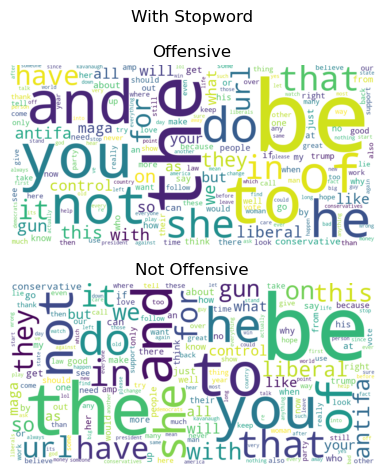

In [14]:
offensive_tweet_with_stop = [tweet_normalized_with_stop[i] for i in offensive_idx]
not_offensive_tweet_with_stop = [tweet_normalized_with_stop[i] for i in not_offensive_idx]
plotutils.plot_wordcloud("With Stopword", ["Offensive", "Not Offensive"], offensive_tweet_with_stop, not_offensive_tweet_with_stop)

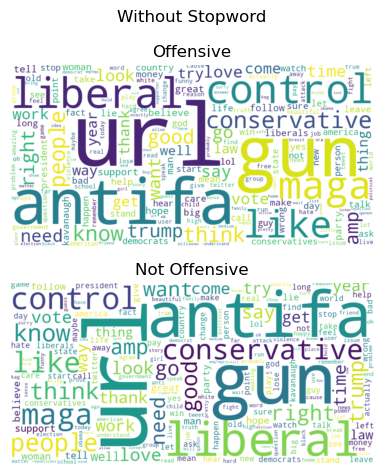

In [15]:
offensive_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in offensive_idx]
not_offensive_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in not_offensive_idx]
plotutils.plot_wordcloud("Without Stopword", ["Offensive", "Not Offensive"], offensive_tweet_wo_stop, not_offensive_tweet_wo_stop)

In [16]:
targeted_idx = ori_train_data[ori_train_data['subtask_b'] == "TIN"].index
untargeted_idx = ori_train_data[ori_train_data['subtask_b'] == "UNT"].index

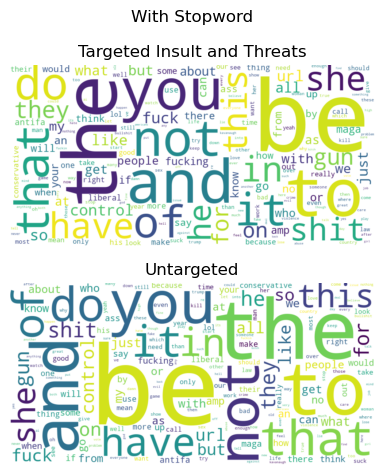

In [17]:
targeted_tweet_with_stop = [tweet_normalized_with_stop[i] for i in targeted_idx]
untargeted_tweet_with_stop = [tweet_normalized_with_stop[i] for i in untargeted_idx]
plotutils.plot_wordcloud("With Stopword", ["Targeted Insult and Threats", "Untargeted"], targeted_tweet_with_stop, untargeted_tweet_with_stop)

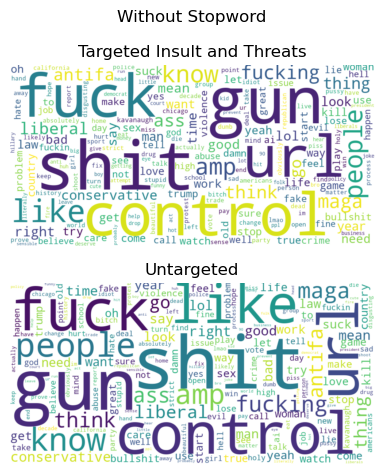

In [18]:
targeted_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in targeted_idx]
untargeted_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in untargeted_idx]
plotutils.plot_wordcloud("Without Stopword", ["Targeted Insult and Threats", "Untargeted"], targeted_tweet_wo_stop, untargeted_tweet_wo_stop)

In [19]:
individual_idx = ori_train_data[ori_train_data['subtask_c'] == "IND"].index
group_idx = ori_train_data[ori_train_data['subtask_c'] == "GRP"].index
other_idx = ori_train_data[ori_train_data['subtask_c'] == "OTH"].index

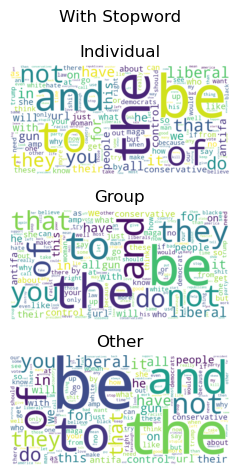

In [20]:
individual_tweet_with_stop = [tweet_normalized_with_stop[i] for i in individual_idx]
group_tweet_with_stop = [tweet_normalized_with_stop[i] for i in group_idx]
other_tweet_with_stop = [tweet_normalized_with_stop[i] for i in other_idx]
plotutils.plot_wordcloud("With Stopword", ["Individual", "Group", "Other"], individual_tweet_with_stop, group_tweet_with_stop, other_tweet_with_stop)

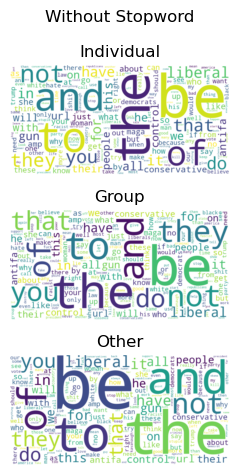

In [21]:
individual_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in individual_idx]
group_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in group_idx]
other_tweet_wo_stop = [tweet_normalized_wo_stop[i] for i in other_idx]
plotutils.plot_wordcloud("Without Stopword", ["Individual", "Group", "Other"], individual_tweet_with_stop, group_tweet_with_stop, other_tweet_with_stop)